In [8]:
import numpy as np
import os
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

2.0.2


In [9]:
class Perceptron:
    """
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0).
    n_iter : int
        Number of passes (epochs) over the training dataset.
    random_state : int, optional
        Random seed for reproducibility.

    ---

    Attributes
    ----------
    w_ : ndarray of shape (n_features,)
        Weights after fitting.
    b_ : float
        Bias (intercept) after fitting.
    errors_ : list of int
        Number of misclassifications (updates) in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Parameters
        ----------
        X: {array-like}, shape = [n_examples, n_features]
            n_examples - examples of Iris, n_features - number of features
        y: array-like
            target values

        ---

        Return values:
        ----------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for xi, tagret in zip(X, y):
                update = self.eta * (tagret - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Weighted sum calculation"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Returns the classification decision"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [10]:
# ignore SSL verification(not recommended)
ssl._create_default_https_context = ssl._create_unverified_context

# iris data
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header=None, encoding="utf-8")
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


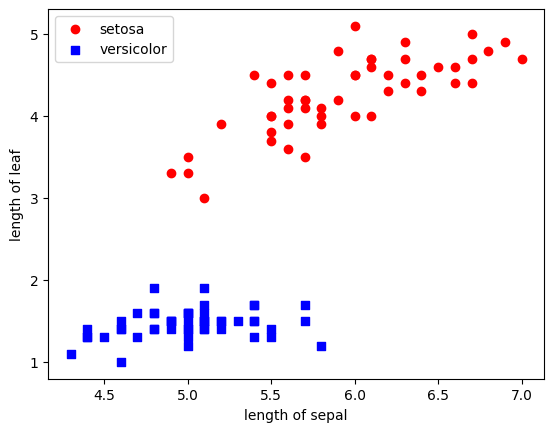

In [11]:
# choosing setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', marker='o', label='setosa')
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='s', label='versicolor')
plt.xlabel("length of sepal")
plt.ylabel("length of leaf")
plt.legend(loc='upper left')
plt.show()


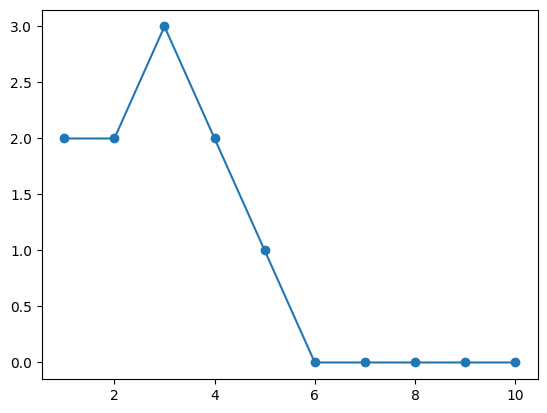

In [12]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.show()

In [13]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # set up markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # create grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # predict for each point in grid
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # draw decision regions
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


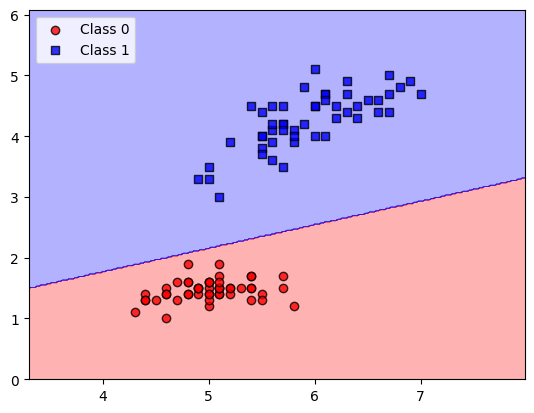

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.legend(loc = 'upper left')
plt.show()